<a href="https://colab.research.google.com/github/cmd-gunma-univ/DX-highschool/blob/main/%E3%82%82%E3%81%AE%E3%81%A4%E3%81%8F%E3%82%8ADX4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPIO出力基礎


## 準備
ここからはラズベリーパイ上のJupyterとGoogle ColaboratoryのGeminiを併用します。\
このテキスト(ipynbファイル)をダウンロードして，ラズベリーパイ上のJupyterにアップロードしましょう。\
ラズベリーパイ上のJupyterで以下のコマンドを実行することで，GPIOピンのリストを見ることができます。

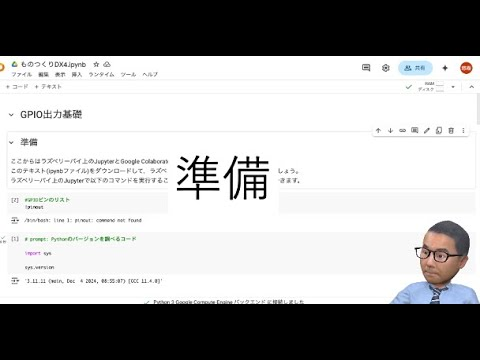

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('iK4T50nCQ2A', width=700, height=500)

In [ ]:
#GPIOピンのリスト
!pinout

Description        : Raspberry Pi 5B rev 1.0
Revision           : d04170
SoC                : BCM2712
RAM                : 8GB
Storage            : MicroSD
USB ports          : 4 (of which 2 USB3)
Ethernet ports     : 1 (1000Mbps max. speed)
Wi-fi              : True
Bluetooth          : True
Camera ports (CSI) : 2
Display ports (DSI): 2

,--------------------------------.
| oooooooooooooooooooo J8   : +====
| 1ooooooooooooooooooo      : |USB2
|  Wi  Pi Model 5B  V1.0  fan +====
|  Fi     +---+      +---+       |
|         |RAM|      |RP1|    +====
||p       +---+      +---+    |USB3
||c      -------              +====
||i        SoC      |c|c J14     |
(        -------  J7|s|s 12 +======
|  J2 bat   uart   1|i|i oo |   Net
| pwr\..|hd|...|hd|o|1|0    +======
`-| |-1o|m0|---|m1|--------------'

J8:
   3V3  (1) (2)  5V    
 GPIO2  (3) (4)  5V    
 GPIO3  (5) (6)  GND   
 GPIO4  (7) (8)  GPIO14
   GND  (9) (10) GPIO15
GPIO17 (11) (12) GPIO18
GPIO27 (13) (14) GND   
GPIO22 (15) (16) GPIO2

In [ ]:
# prompt: Pythonのバージョンを調べるコード

import sys

sys.version

'3.11.2 (main, Sep 14 2024, 03:00:30) [GCC 12.2.0]'

## Lチカ




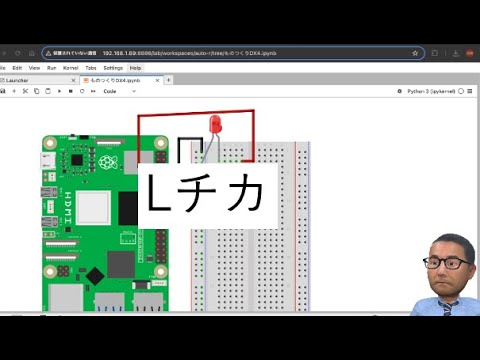

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('aCPHbjS1BS4', width=700, height=500)

LEDを1秒おきに点滅するコードを書きましょう。\
GPIO制御にはRPi.GPIOというライブラリを使います。\
GPIOピンとして`GPIO3`を使いましょう。
- LEDの+(足が長い方) → GPIO3
- LEDの-(足が短い方) → GND

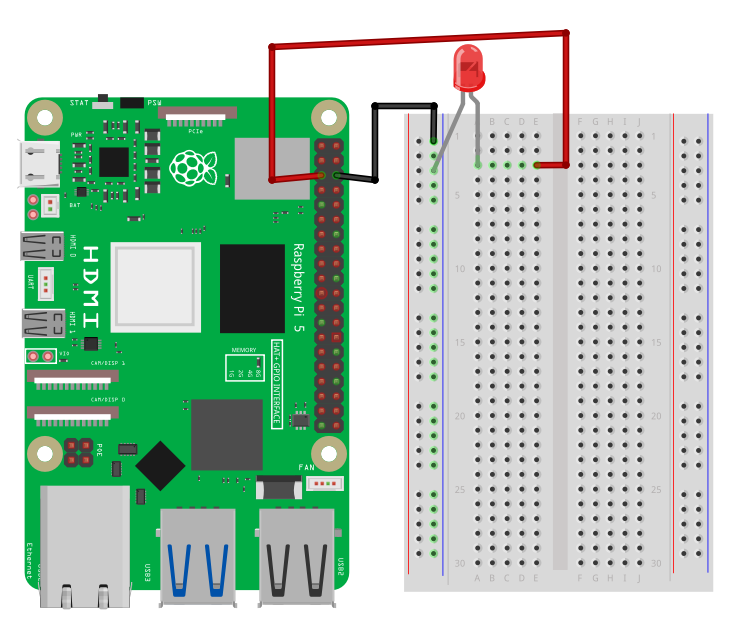

In [ ]:
# prompt: ラズベリーパイを使う。
# Pythonのバージョンは3.11。
# RPi.GPIOを使う。
# GPIO3を使う。
# LEDを１秒おきに点滅させるコードを書きなさい。

import RPi.GPIO as GPIO
import time

# GPIOピン番号の設定
GPIO_PIN = 3

# GPIOピン番号のモード設定
GPIO.setmode(GPIO.BCM)

# GPIOピンの出力設定
GPIO.setup(GPIO_PIN, GPIO.OUT)

try:
    while True:
        # LEDを点灯
        GPIO.output(GPIO_PIN, GPIO.HIGH)
        time.sleep(1)  # 1秒待つ

        # LEDを消灯
        GPIO.output(GPIO_PIN, GPIO.LOW)
        time.sleep(1)  # 1秒待つ

except KeyboardInterrupt:
    # Ctrl+Cで終了した場合の処理
    pass

finally:
    # GPIOのクリーンアップ
    GPIO.cleanup()


## プログラムの停止方法
## カーネルの再起動
- **Escを押したのちに，0を2回押す**

## 練習問題1
`GPIO12`を使って，0.5秒ON，1秒OFFを繰り返すコードを以下に書きなさい。

## 練習問題2
`GPIO3`に赤のLED，`GPIO12`に緑のLEDを繋ぎ，1秒おきに交互に点灯するコードを以下に書きなさい。

## PWM(パルス幅変調)


In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Et4n9fx38gk', width=700, height=500)

LEDの1/0の出力制御(ON/OFF制御)はできるようになりました。\
LEDを「明るさ」を制御するにはどうすればいいでしょうか？\
GPIOピンからは0/1の出力しかできません，，，。

LEDは応答時間が速いことを利用し，素早くON/OFFを繰り返し，OFFの時間に対してのONの時間を短くすることで，LEDをあたかも暗く点灯しているように見せることができます。\
ONの「パルス幅を変調」することで0と1の間の連続値を表現する方法をPWMと呼びます。\
以下の回路を作り，`0.3`を表現する方法を考えましょう。\
周期は50 Hz = 20 msとします。\
20 msのうち3割だけ点灯させるには6 msをON，14 msをOFFとする必要があります。

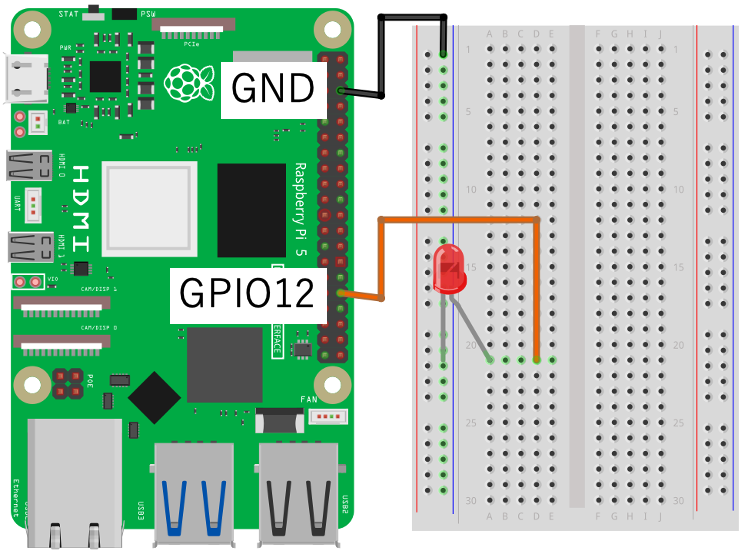

In [ ]:
# GPIO12がずっとON
import RPi.GPIO as GPIO
import time

# GPIOピン番号の設定
GPIO_PIN = 12

# GPIOピン番号のモード設定
GPIO.setmode(GPIO.BCM)

# GPIOピンの出力設定
GPIO.setup(GPIO_PIN, GPIO.OUT)

GPIO.output(GPIO_PIN, GPIO.HIGH)

In [ ]:
# GPIO12が50 Hzで3割だけON
import RPi.GPIO as GPIO
import time

# GPIOピン番号の設定
GPIO_PIN = 12

# GPIOピン番号のモード設定
GPIO.setmode(GPIO.BCM)

# GPIOピンの出力設定
GPIO.setup(GPIO_PIN, GPIO.OUT)

try:
    while True:
        # LEDを点灯
        GPIO.output(GPIO_PIN, GPIO.HIGH)
        time.sleep(0.006)  # 6ミリ秒待つ

        # LEDを消灯
        GPIO.output(GPIO_PIN, GPIO.LOW)
        time.sleep(0.014)  # 14ミリ秒待つ

except KeyboardInterrupt:
    # Ctrl+Cで終了した場合の処理
    pass

finally:
    # GPIOのクリーンアップ
    GPIO.cleanup()

## PWMの応用例


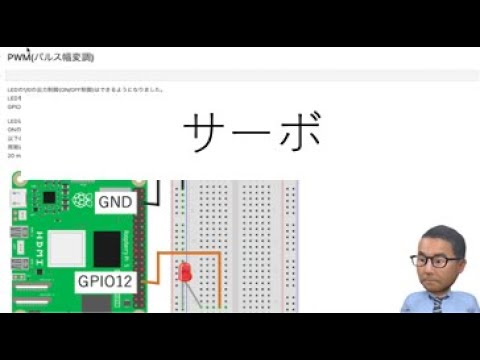

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('m_9URNnajww', width=700, height=500)

-90°〜90°まで180°回転するサーボSG-90をPWMで制御します。\
[データシート](https://akizukidenshi.com/goodsaffix/SG90_a.pdf)

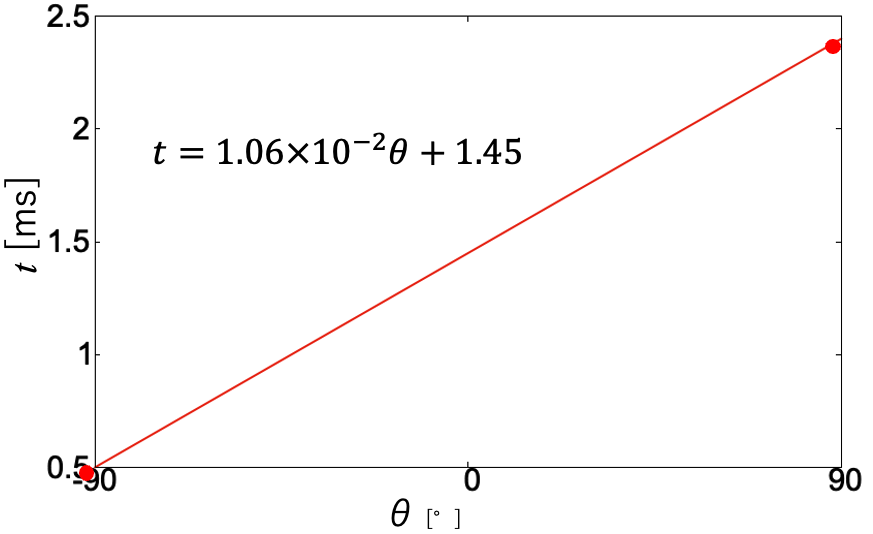

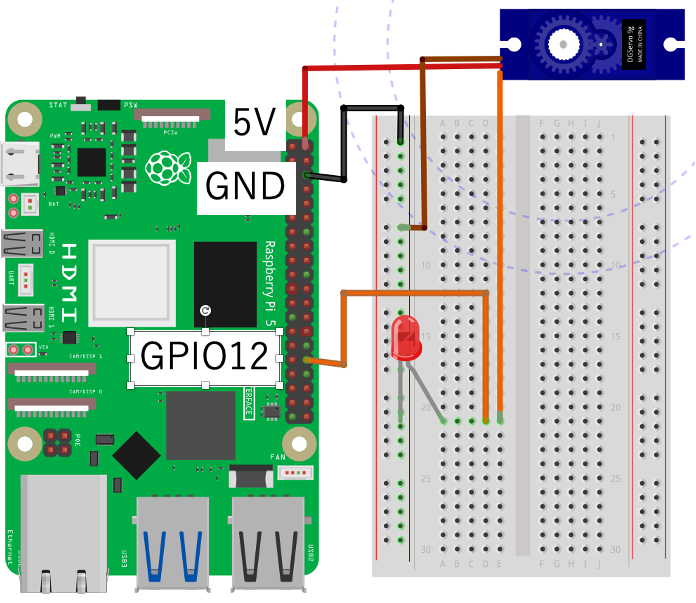

In [ ]:
# 1秒おきに-90, 0, 90°を繰り返すコード

import RPi.GPIO as GPIO
import time

# GPIOピン番号の設定
GPIO_PIN = 12

# GPIOピン番号のモード設定
GPIO.setmode(GPIO.BCM)

# GPIOピンの出力設定
GPIO.setup(GPIO_PIN, GPIO.OUT)

try:
    while True:
        for i in range(50):
            on = 0.5
            off = 20 - on
            # LEDを点灯
            GPIO.output(GPIO_PIN, GPIO.HIGH)
            time.sleep(on*0.001)

            # LEDを消灯
            GPIO.output(GPIO_PIN, GPIO.LOW)
            time.sleep(off*0.001)

        for i in range(50):
            on = 1.45
            off = 20 - on
            # LEDを点灯
            GPIO.output(GPIO_PIN, GPIO.HIGH)
            time.sleep(on*0.001)

            # LEDを消灯
            GPIO.output(GPIO_PIN, GPIO.LOW)
            time.sleep(off*0.001)
        for i in range(50):
            on = 2.4
            off = 20 - on
            # LEDを点灯
            GPIO.output(GPIO_PIN, GPIO.HIGH)
            time.sleep(on*0.001)

            # LEDを消灯
            GPIO.output(GPIO_PIN, GPIO.LOW)
            time.sleep(off*0.001)
except KeyboardInterrupt:
    # Ctrl+Cで終了した場合の処理
    pass

finally:
    # GPIOのクリーンアップ
    GPIO.cleanup()
